In [1]:
from __future__ import print_function, division

import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Flatten, Reshape, Input, BatchNormalization, Activation, ZeroPadding2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import UpSampling2D, Conv2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from PIL import Image
from keras.utils import plot_model
from numpy import random

import matplotlib.pyplot as plt
import numpy as np
import sys
import os as os

In [2]:
noise_shape = 100
nh = 64
nw = 64
nc = 3
img_shape = (nh, nw, nc)

# Carefully chosen parameters 
d_opt = Adam(lr = 0.0002, beta_1 = 0.5)
g_opt = Adam(lr = 0.0002, beta_1 = 0.5)

In [3]:
def build_generator():
  
  model = Sequential()
  model.add(Dense(128 * 4 * 4, activation="relu", input_dim = noise_shape, name = 'Dense_Layer'))
  model.add(Reshape((4, 4, 128) , name = "Reshape_Layer"))
  
  model.add(UpSampling2D(name = 'UpSampling_Layer'))
  model.add(Conv2D(64, kernel_size=3,  padding="same", name = "Conv_Layer"))
  model.add(LeakyReLU(alpha=0.2, name = 'Leaky_ReLU'))
  model.add(BatchNormalization(momentum=0.8, name = "Batch_Norm"))
  
  model.add(UpSampling2D(name = 'UpSampling_Layer_2'))
  model.add(Conv2D(32, kernel_size=3, padding="same", name = 'Conv_Layer_2'))
  model.add(LeakyReLU(alpha=0.2, name = 'Leaky_ReLU_2'))
  model.add(BatchNormalization(momentum=0.8, name = 'Batch_Norm_2'))
  
  model.add(UpSampling2D(name = 'UpSampling_Layer_3'))
  model.add(Conv2D(16, kernel_size=3, padding="same", name = 'Conv_Layer_3'))
  model.add(LeakyReLU(alpha=0.2, name = 'Leaky_ReLU_3'))
  model.add(BatchNormalization(momentum=0.8, name = 'Batch_Norm_3'))
  
  model.add(UpSampling2D(name = 'UpSampling_Layer_4'))
  model.add(Conv2D(8, kernel_size=3, padding="same", name = 'Conv_Layer_4'))
  model.add(LeakyReLU(alpha=0.2, name = 'Leaky_ReLU_4'))
  model.add(BatchNormalization(momentum=0.8, name = 'Batch_Norm_4'))
  
  model.add(Conv2D(4, kernel_size=3, padding="same", name = 'Conv_Layer_5'))
  model.add(LeakyReLU(alpha=0.2, name = 'Leaky_ReLU_5'))
  model.add(BatchNormalization(momentum=0.8, name = 'Batch_Norm_5'))
  
  model.add(Conv2D(3, kernel_size=3, padding="same", name = 'Conv_Layer_6'))
  model.add(LeakyReLU(alpha=0.2, name = 'Leaky_ReLU_6'))
  model.add(BatchNormalization(momentum=0.8, name = 'Batch_Norm_6'))
  model.add(Activation("tanh"))
   
  print(model.summary())
  
  #Picturizing model
  plot_model(model, to_file='Model Architecture/generator.png')
  
  noise = Input(shape = (noise_shape,))
  img = model(noise)
  
  return Model(inputs = noise, outputs = img, name = "Generator")
  

In [4]:
generator = build_generator()
generator.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Dense_Layer (Dense)          (None, 2048)              206848    
_________________________________________________________________
Reshape_Layer (Reshape)      (None, 4, 4, 128)         0         
_________________________________________________________________
UpSampling_Layer (UpSampling (None, 8, 8, 128)         0         
_________________________________________________________________
Conv_Layer (Conv2D)          (None, 8, 8, 64)          73792     
_________________________________________________________________
Leaky_ReLU (LeakyReLU)       (None, 8, 8, 64)          0         
_________________________________________________________________
Batch_Norm (BatchNormalizati (None, 8, 8, 64)          256       
_________________________________________________________________
UpSampling_Layer_2 (UpSampli (None, 16, 16, 64)        0

In [5]:
def build_discriminator():
  model = Sequential()
  
  model.add(Conv2D(4, kernel_size=3, input_shape = img_shape, padding="same", name = 'Conv_Layer'))
  model.add(LeakyReLU(alpha=0.2, name = 'Leaky_ReLU'))
  model.add(BatchNormalization(momentum=0.8, name = 'Batch_Norm'))
  
  model.add(Conv2D(8, kernel_size=3, strides = 2, name = 'Conv_Layer_2'))
  model.add(LeakyReLU(alpha=0.2, name = 'Leaky_ReLU_2'))
  model.add(BatchNormalization(momentum=0.8, name = 'Batch_Norm_2'))
  
  model.add(Conv2D(16, kernel_size=3, strides = 2, name = 'Conv_Layer_3'))
  model.add(LeakyReLU(alpha=0.2, name = 'Leaky_ReLU_3'))
  model.add(BatchNormalization(momentum=0.8, name = 'Batch_Norm_3'))
  
  model.add(Conv2D(32, kernel_size=3, strides = 2, name = 'Conv_Layer_4'))
  model.add(LeakyReLU(alpha=0.2, name = 'Leaky_ReLU_4'))
  model.add(BatchNormalization(momentum=0.8, name = 'Batch_Norm_4'))
  
  model.add(Conv2D(64, kernel_size=2, strides = 1, name = 'Conv_Layer_5'))
  model.add(LeakyReLU(alpha=0.2, name = 'Leaky_ReLU_5'))
  model.add(BatchNormalization(momentum=0.8, name = 'Batch_Norm_5'))
  
  
  model.add(Flatten(name = 'Flatten'))
  model.add(Dense(512, name = 'Dense_Layer'))
  model.add(LeakyReLU(alpha=0.2, name = 'Leaky_ReLU_6'))
  
  model.add(Dense(256, name = 'Dense_Layer_2'))
  model.add(LeakyReLU(alpha=0.2, name = 'Leaky_ReLU_7'))
  model.add(Dense(1, activation='sigmoid', name = 'Dense_with_Sigmoid'))
  
  print(model.summary())
  
  #Picturizing model
  plot_model(model, to_file='Model Architecture/discriminator.png')
  
  img = Input(shape = img_shape)
  validity = model(img)
  
  return Model(inputs = img, outputs = validity, name = 'Discriminator')

In [6]:
discriminator = build_discriminator()
discriminator.summary()

discriminator.compile(loss = 'binary_crossentropy', optimizer = d_opt, metrics = ['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv_Layer (Conv2D)          (None, 64, 64, 4)         112       
_________________________________________________________________
Leaky_ReLU (LeakyReLU)       (None, 64, 64, 4)         0         
_________________________________________________________________
Batch_Norm (BatchNormalizati (None, 64, 64, 4)         16        
_________________________________________________________________
Conv_Layer_2 (Conv2D)        (None, 31, 31, 8)         296       
_________________________________________________________________
Leaky_ReLU_2 (LeakyReLU)     (None, 31, 31, 8)         0         
_________________________________________________________________
Batch_Norm_2 (BatchNormaliza (None, 31, 31, 8)         32        
_________________________________________________________________
Conv_Layer_3 (Conv2D)        (None, 15, 15, 16)       

In [7]:
z = Input(shape = (noise_shape,), name = "Input_Noise")
img = generator(z)

discriminator.trainable = False
valid = discriminator(img)

combined = Model(z, valid)
combined.compile(loss = 'binary_crossentropy', optimizer = g_opt)
combined.summary()

#Picturizing model
plot_model(combined, to_file='Model Architecture/combined.png')

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_Noise (InputLayer)     [(None, 100)]             0         
_________________________________________________________________
Generator (Functional)       (None, 64, 64, 3)         305799    
_________________________________________________________________
Discriminator (Functional)   (None, 1)                 1326713   
Total params: 1,632,512
Trainable params: 305,545
Non-trainable params: 1,326,967
_________________________________________________________________
('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [8]:
print(generator.summary())
print(discriminator.summary())
print(combined.summary())

Model: "Generator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
sequential (Sequential)      (None, 64, 64, 3)         305799    
Total params: 305,799
Trainable params: 305,545
Non-trainable params: 254
_________________________________________________________________
None
Model: "Discriminator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 1)                 1326713   
Total params: 1,326,713
Trainable params: 0
Non-trainable params: 1,326,713
_________________________________________________________________
None
Model:

In [9]:
def get_batch(width, height):
  image_files = os.listdir("C:\\Users\\Tushar\\Downloads\\DCGAN\\content\\100k\\")[:]
  data_batch = []
  
  for file in image_files:
    img = Image.open("C:\\Users\\Tushar\\Downloads\\DCGAN\\content\\100k\\"+file).resize([width, height])
    data_batch.append(np.array(img.convert('RGB')))
    
  data_batch = np.array(data_batch)
  print(data_batch.shape)
  return data_batch

In [10]:
g_losses = []
d_losses = []

In [11]:
def train(batch_size = 64, epochs = 4000):
  
  
  valid = np.ones((batch_size, 1))
  fakes = np.zeros((batch_size, 1))
  
  X_train = get_batch(nw, nh)
  X_train = (X_train.astype(np.float32) - 127.5) / 127.5
  
  for epoch in range(epochs):
    
    idx = np.random.randint(0, X_train.shape[0], batch_size)
    imgs = X_train[idx]
    
    noise = np.random.normal(0, 1, (batch_size, noise_shape))
    
    gen_imgs = generator.predict(noise)

    #Training Discriminator
    d_loss_real = discriminator.train_on_batch(imgs, valid)
    d_loss_fake = discriminator.train_on_batch(gen_imgs, fakes)
    d_loss = 0.5*np.add(d_loss_real, d_loss_fake)

    #Training Generator
    g_loss = combined.train_on_batch(noise, valid)

    #Progress
    if (epoch+1)%1000 == 0:
        print("epoch: " + str(epoch+1) + " " + "D_Loss = " + str(d_loss[0]) + " " + "acc: " + str(d_loss[1]*100) + " " +  "G_Loss = " + str(g_loss))
   
    g_losses.append(float(d_loss[0]))
    d_losses.append(float(g_loss))

In [13]:
train(128, 1000)

(100000, 64, 64, 3)
epoch: 1000 D_Loss = 0.0005970331403659657 acc: 100.0 G_Loss = 0.009568886831402779


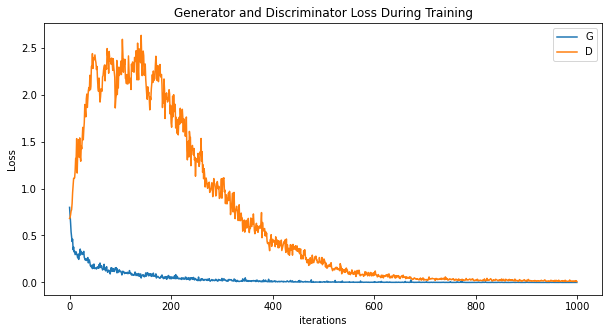

In [14]:
plt.figure(figsize=(10,5))
plt.title("Generator and Discriminator Loss During Training")
plt.plot(g_losses,label="G")
plt.plot(d_losses,label="D")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [1]:
generator.save_weights('generator1.h5')
discriminator.save_weights('discriminator1.h5')

NameError: name 'generator' is not defined

In [29]:
generator.load_weights('generator1.h5')
discriminator.load_weights('discriminator1.h5')

In [16]:
!mkdir 'images'

# Generating Images

In [30]:
def save_imgs(epoch):
  r, c = 3, 3
  noise = np.random.normal(0, 1, (r * c, noise_shape))
  gen_imgs = generator.predict(noise)

  # Rescale images 0 - 1
  gen_imgs = (1/2.5) * gen_imgs + 0.5

  fig, axs = plt.subplots(r, c)
  cnt = 0
  for i in range(r):
      for j in range(c):
          axs[i,j].imshow(gen_imgs[cnt, :,:,:])
          axs[i,j].axis('off')
          cnt += 1
  fig.savefig("images/%d.png" % epoch)
  plt.close()

In [31]:
save_imgs(100)